## 1. Example

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


#### Load Data

(b, h, w, c)
(1, 5, 5, 1)
[[1. 3. 5. 7. 9.]
 [3. 5. 7. 9. 7.]
 [5. 7. 9. 7. 5.]
 [7. 9. 7. 5. 3.]
 [9. 7. 5. 3. 1.]]


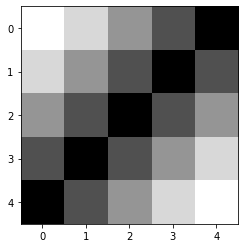

In [2]:
image = tf.constant([[[[1],[3],[5],[7],[9]],
                   [[3],[5],[7],[9],[7]],
                   [[5],[7],[9],[7],[5]],
                   [[7],[9],[7],[5],[3]],
                   [[9],[7],[5],[3],[1]]]], dtype=np.float32)
print("(b, h, w, c)")
print(image.shape)
print(image.numpy().reshape(5,5))
plt.imshow(image.numpy().reshape(5,5), cmap='Greys')
plt.show()

#### Pooling - Conparison

############## MaxPooling ##############
pool1.shape (1, 4, 4, 1)
[[5. 7. 9. 9.]
 [7. 9. 9. 9.]
 [9. 9. 9. 7.]
 [9. 9. 7. 5.]]


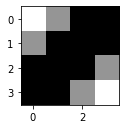

############## AveragePooling ##############
pool2.shape (1, 4, 4, 1)
[[3. 5. 7. 8.]
 [5. 7. 8. 7.]
 [7. 8. 7. 5.]
 [8. 7. 5. 3.]]


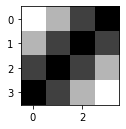

############## Max : Average = 1 : 1 ##############
[[4.  6.  8.  8.5]
 [6.  8.  8.5 8. ]
 [8.  8.5 8.  6. ]
 [8.5 8.  6.  4. ]]


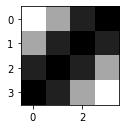

############## Max : Average = 3 : 2 ##############
[[4.2 6.2 8.2 8.6]
 [6.2 8.2 8.6 8.2]
 [8.2 8.6 8.2 6.2]
 [8.6 8.2 6.2 4.2]]


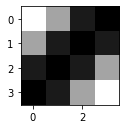

In [3]:
# 1. MaxPolling
print("############## MaxPooling ##############")

pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print("pool1.shape", pool1.shape)
pool_imgs1 = np.swapaxes(pool1, 0, 3)
for i, pool_img in enumerate(pool_imgs1):
    print(pool_img.reshape(4,4))
    plt.subplot(1,3,i+1), plt.imshow(pool_img.reshape(4,4), cmap='Greys')
plt.show()


# 2. AveragePolling
print("############## AveragePooling ##############")

pool2 = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print("pool2.shape", pool2.shape)
pool_imgs2 = np.swapaxes(pool2, 0, 3)
for i, pool_img in enumerate(pool_imgs2):
    print(pool_img.reshape(4,4))
    plt.subplot(1,3,i+1), plt.imshow(pool_img.reshape(4,4), cmap='Greys')
plt.show()


# 3. Max : Average = 3 : 2
print("############## Max : Average = 1 : 1 ##############")
for i in range(len(pool_imgs1)):
    pool_img = (pool_imgs1[i]*1 + pool_imgs2[i]*1)/2
    print(pool_img.reshape(4,4))
    plt.subplot(1,3,i+1), plt.imshow(pool_img.reshape(4,4), cmap='Greys')
plt.show()

# 3. Max : Average = 3 : 2
print("############## Max : Average = 3 : 2 ##############")
for i in range(len(pool_imgs1)):
    pool_img = (pool_imgs1[i]*3 + pool_imgs2[i]*2)/5
    print(pool_img.reshape(4,4))
    plt.subplot(1,3,i+1), plt.imshow(pool_img.reshape(4,4), cmap='Greys')
plt.show()

## 2. Application

#### Load Data

(540, 960, 3)
<class 'numpy.ndarray'>


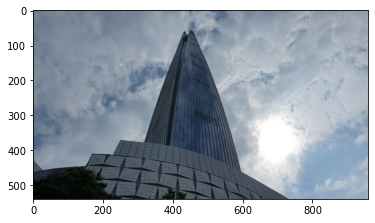

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

filePath = "롯데월드타워_024.jpg"

stream = open( filePath.encode("utf-8") , "rb")
bytes = bytearray(stream.read())
numpyArray = np.asarray(bytes, dtype=np.uint8)

landmark_1 = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

landmark_1 = cv2.cvtColor(landmark_1, cv2.COLOR_BGR2RGB)
landmark_1 = landmark_1.astype(np.float32) / 255.

print(landmark_1.shape)
print(type(landmark_1))

plt.imshow(landmark_1)
plt.show()

#### Convolutaion

conv2d.shape (1, 540, 960, 6)


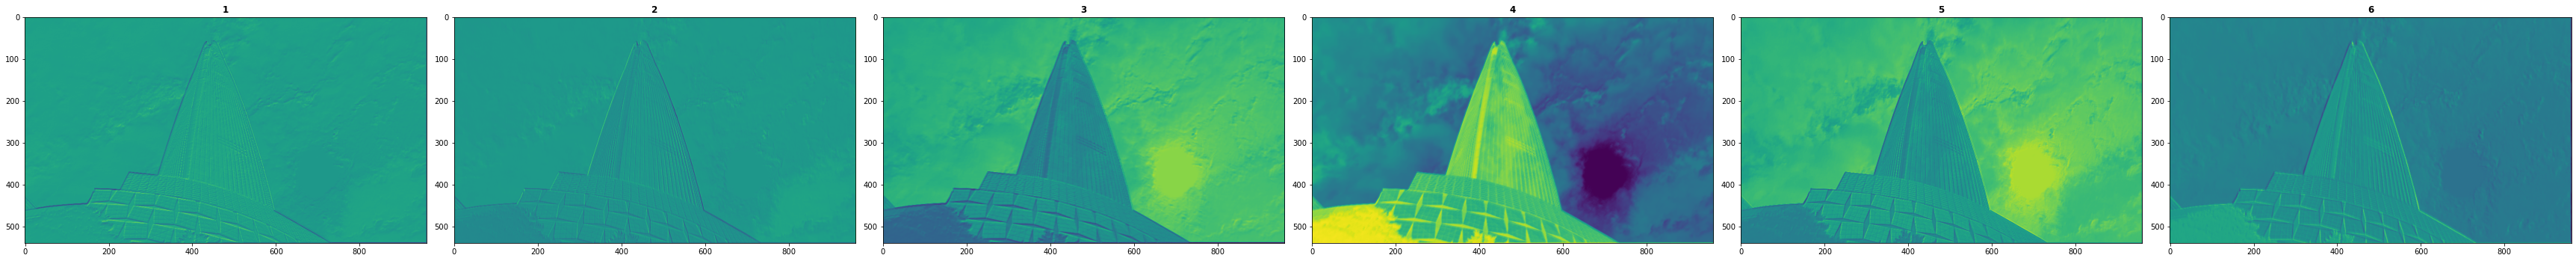

In [5]:
landmark_1 = landmark_1.reshape(1,540,960,3)
landmark_1 = tf.convert_to_tensor(landmark_1)

weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                             kernel_initializer=weight_init)(landmark_1)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)

## Plot 1
fig, axes = plt.subplots(1, len(feature_maps), 
                         figsize=(48, 54),
                         tight_layout=True)

for i, feature_map in enumerate(feature_maps):
    axes[i].imshow(feature_map.reshape(540,960))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## Plot 2
#for i, feature_map in enumerate(feature_maps):
#    #print(feature_map.reshape(540,960))
#    plt.subplot(1,len(feature_maps),i+1), plt.imshow(feature_map.reshape(540,960))
#plt.show()

#### Pooling - Conparison

############## MaxPooling ##############
conv2d.shape (1, 540, 960, 6)
pool1.shape (1, 270, 480, 6)


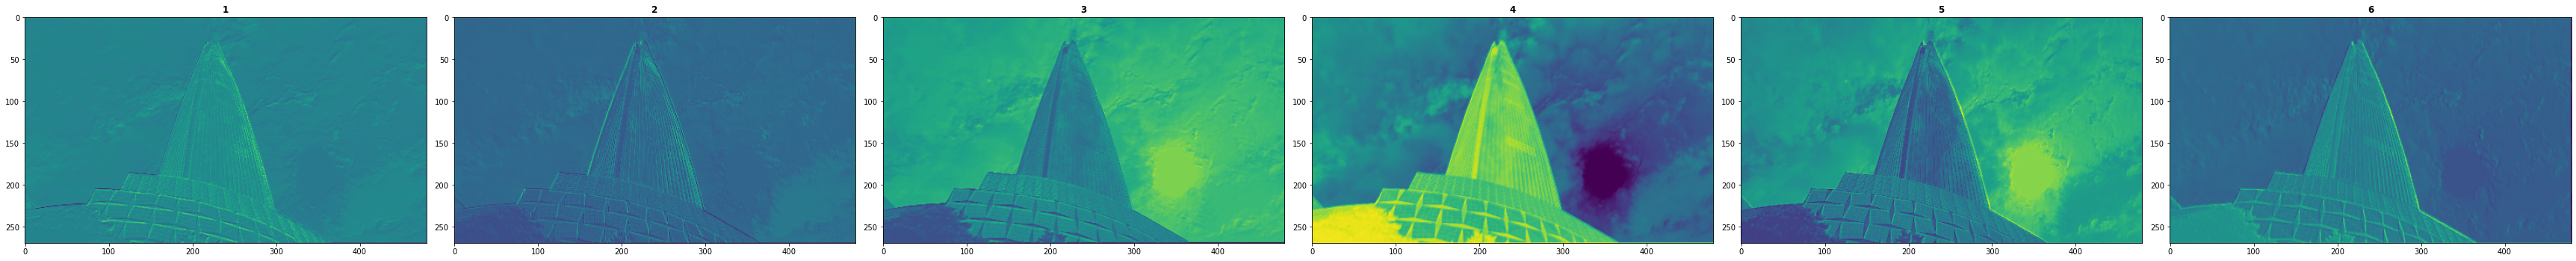

############## AveragePooling ##############
conv2d.shape (1, 540, 960, 6)
pool2.shape (1, 270, 480, 6)


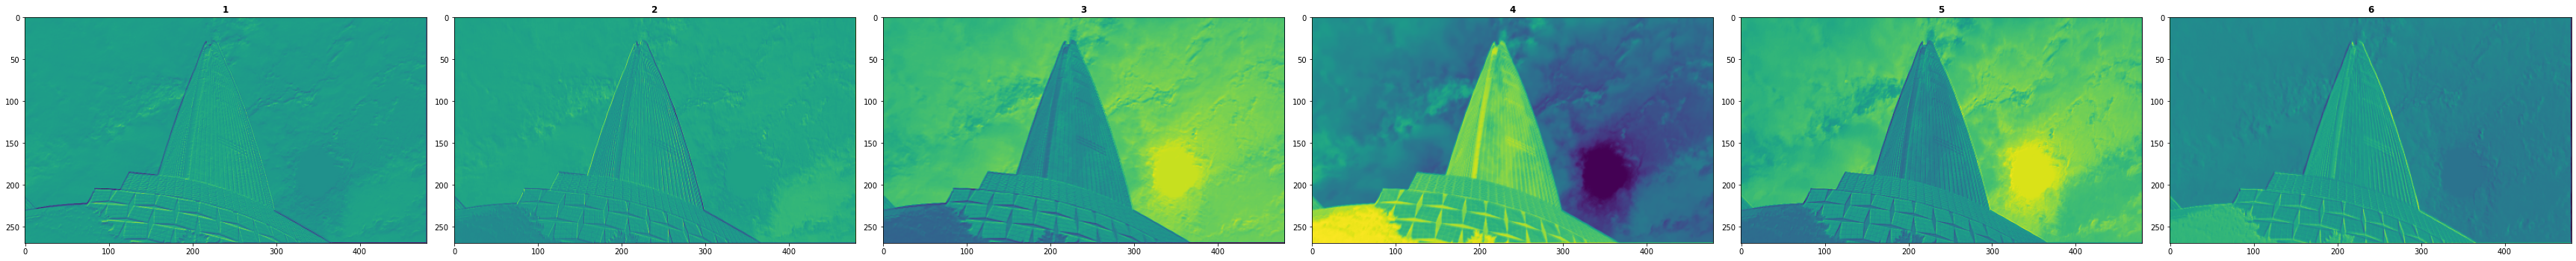

############## Max : Average = 3 : 2 ##############


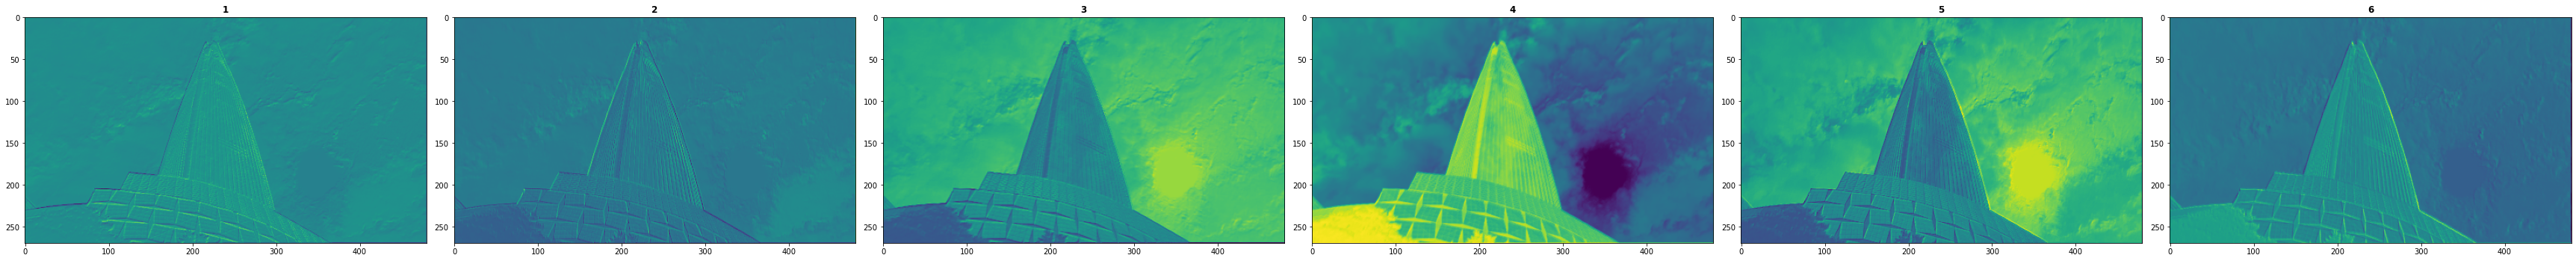

In [6]:
# 1. MaxPolling
print("############## MaxPooling ##############")

print("conv2d.shape", conv2d.shape)

pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print("pool1.shape", pool1.shape)
pool_imgs1 = np.swapaxes(pool1, 0, 3)


## Plot 1
fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs1):
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## Plot 2
#for i, pool_img in enumerate(pool_imgs1):
#    #print(pool_img.reshape(540,960))
#    plt.subplot(1,len(pool_imgs1),i+1), plt.imshow(pool_img.reshape(270,480))
#plt.show()


# 2. AveragePolling
print("############## AveragePooling ##############")

print("conv2d.shape", conv2d.shape)

pool2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print("pool2.shape", pool2.shape)
pool_imgs2 = np.swapaxes(pool2, 0, 3)


## Plot 1
fig, axes = plt.subplots(1, len(pool_imgs2), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs2):
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()


# 3. Max : Average = 3 : 2
print("############## Max : Average = 3 : 2 ##############")

fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)

for i in range(len(pool_imgs1)):
    pool_img = (pool_imgs1[i]*3 + pool_imgs2[i]*2)/5
    #print(pool_img.reshape(270,480))
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()